---
# **Disciplina:** CAT212 - Microfísica de Nuvens e Eletricidade Atmosférica
---

## 🟢  **Aula Prática 3:** $\underline{Trabalhando\ com\ dados\ de\ Estações\ Meteorológicas}$

---


**OBJETIVO:**
Nesta aula prática aprenderemos como baixar e trabalhar com dados de **Estações Meteorológicas de Superfície (EMS)** do INMET.

---


**DADOS DE ENTRADA**:
- **Tipo do dado:** tabela em formato CSV
- **Formato do dado:** arquivo TEXTO
- **Nome do arquivo:** INMET_SE_MG_A521_BELO HORIZONTE (PAMPULHA)_01-01-2021_A_31-12-2021.CSV
- **Fonte dos dados:** [INMET](https://portal.inmet.gov.br/dadoshistoricos)


---

**DADOS DE SAÍDA:**
- **Tipo do dado:** Figura e tabela
- **Formato do dado:** arquivo JPG e CSV
- **Imagens geradas:**
    1. A531_Fig_1a_horario_climatologia_precipitacao.jpg
    2. A531_Fig_1b_horario_climatologia_radiacao_e_temperatura.jpg
    3. A531_Fig_2_diario_precipitacao.jpg
    4. A531_Fig_3a_mensal_precipitacao.jpg
    5. A531_Fig_3b_mensal_climatologia_precipitacao.jpg
    6. A531_Fig_3b_mensal_climatologia_precipitacao.jpg
    7. A531_tabela_mensal.csv



---

**PROCEDIMENTO REALIZADO:**
- Os seguintes procedimentos são realizados nesse código:

1.   Instalação de bibliotecas
2.   Importação de biblotecas
3.   Montando drive
4.   Definindo caminho do drive
5.   Baixando e descompactando arquivos
6.   Escolhendo a estação meteorológica
7.   Plotar gráfico do **ciclo horário**
8.   Plotar gráfico do **ciclo diário**
9.   Plotar gráfico do **ciclo mensal**
10.  Plotar gráfico do **ciclo anual**
11.  Salvar os dados em arquivo **csv**


---

- **Todas** as estações retornam as seguintes variáveis:
    1.  PRECIPITAÇÃO TOTAL, HORÁRIO [mm]
    2.  PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA [mB]
    3.  PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) [mB]
    4.  PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) [mB]
    5.  RADIACAO GLOBAL [Kj/m²]
    6.  TEMPERATURA DO AR - BULBO SECO, HORARIA [°C]
    7.  TEMPERATURA DO PONTO DE ORVALHO [°C]
    8.  TEMPERATURA MÁXIMA NA HORA ANT. (AUT) [°C]
    9.  TEMPERATURA MÍNIMA NA HORA ANT. (AUT) [°C]
    10. TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) [°C]
    11. TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) [°C]
    12. UMIDADE REL. MAX. NA HORA ANT. (AUT) [%]
    13. UMIDADE REL. MIN. NA HORA ANT. (AUT) [%]
    14. UMIDADE RELATIVA DO AR, HORARIA [%]
    15. VENTO, DIREÇÃO HORARIA [gr]
    16. VENTO, RAJADA MAXIMA [m/s]
    17. VENTO, VELOCIDADE HORARIA [m/s]

---




**OBSERVAÇÕES IMPORTANTES**:
1. Baixar os dados do site do [INMET](https://portal.inmet.gov.br/dadoshistoricos) e fazer o download para a pasta *input* do seu drive.
1. Mudar o caminho para o do seu drive.
2. Vocês deverão escolher a estação de superfície pelo **código**.



---
**PROFESSOR:**

 - Enrique Vieira Mattos - UNIFEI: enrique@unifei.edu.br / https://github.com/evmpython
 - Atualizado em: 22/04/2025




---



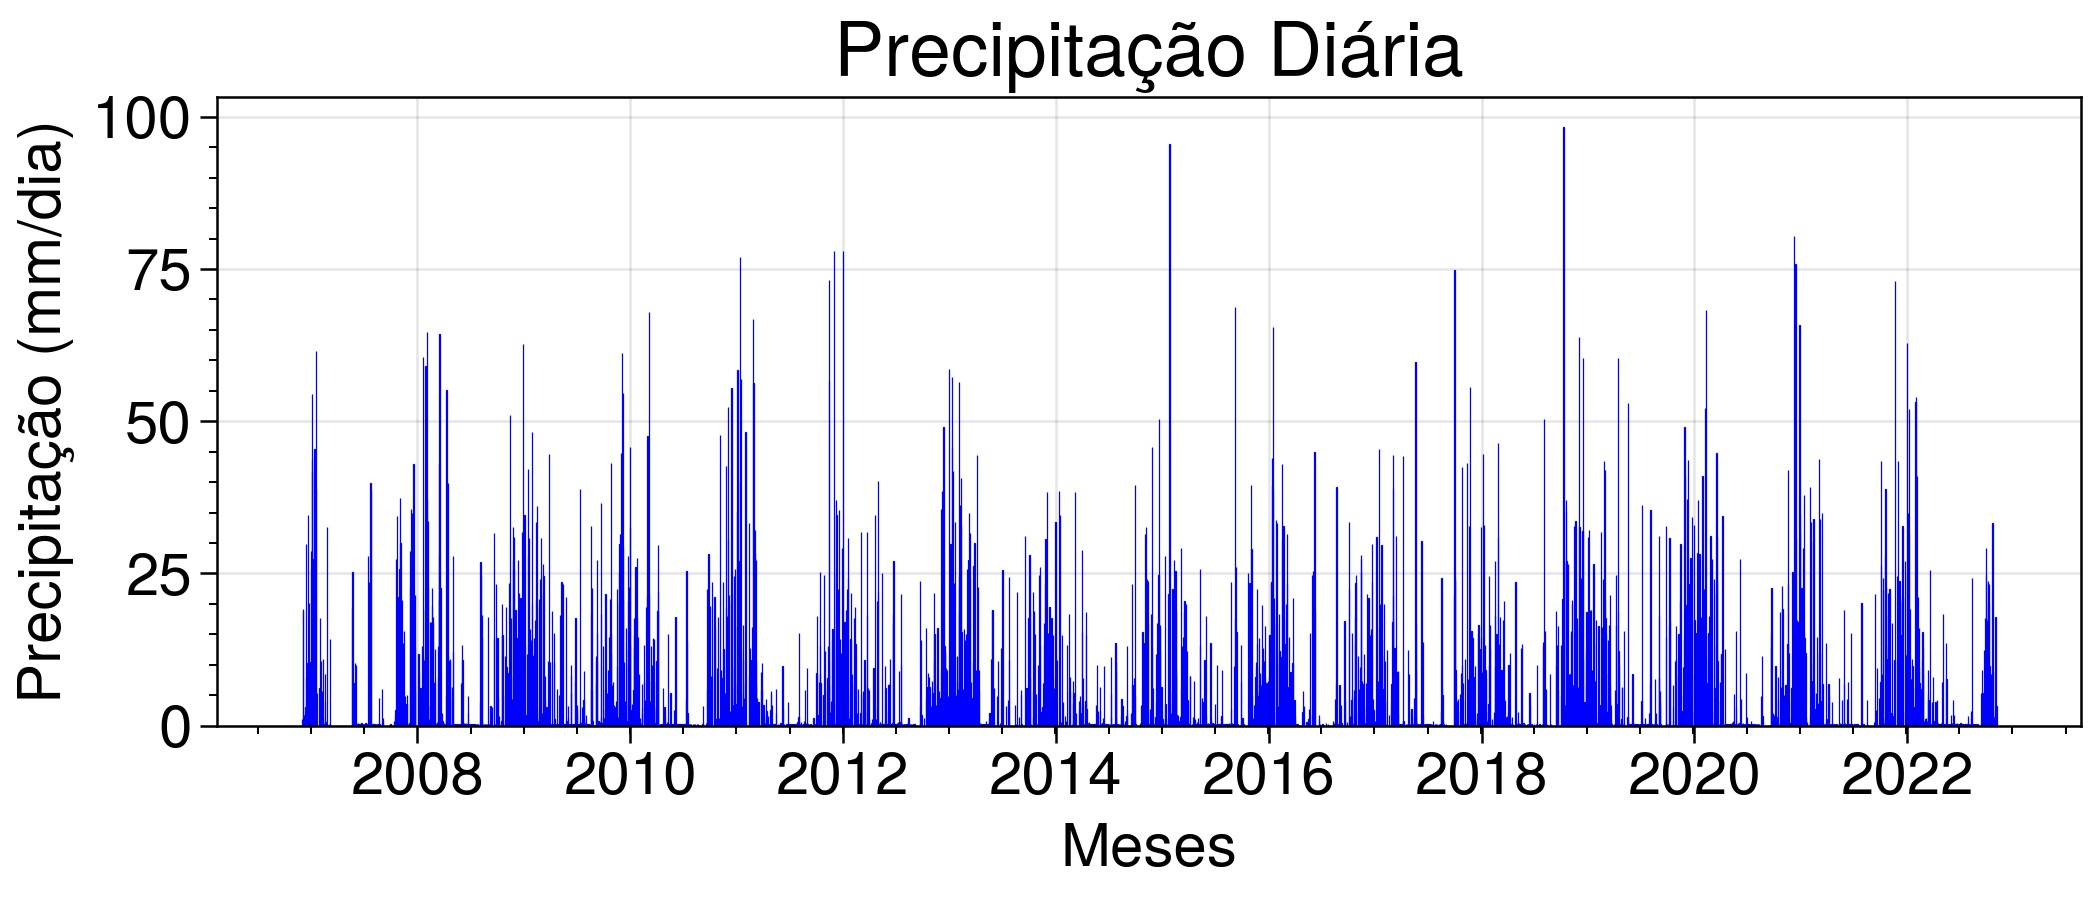

# **1° Passo:** Instalando bibliotecas

Vamos instalar a biblioteca Ultraplot que serve para visualização meteorológica especializada com suporte a projeções cartográficas e dados atmosféricos.

In [ ]:
!pip install -q ultraplot

# **2° Passo:** Importando Bibliotecas

In [ ]:
import numpy as np                # Fundamentos numéricos: Arrays multidimensionais de alto desempenho e operações matemáticas
import pandas as pd               # Estruturas de dados intuitivas (Series/DataFrames) para análise e manipulação de dados eficiente
import matplotlib.pyplot as plt   # Visualização de dados 2D/3D com gráficos estáticos, interativos e publicáveis
import ultraplot as uplt          # Visualização meteorológica especializada com suporte a projeções cartográficas e dados atmosféricos
import seaborn as sns             # Visualização estatística de alto nível baseada em matplotlib com estilos pré-definidos
import os                         # Interface multiplataforma para operações do sistema: caminhos, arquivos, diretórios e variáveis de ambiente
import zipfile                    # Compactação e descompactação de arquivos ZIP com suporte a diferentes métodos de compressão
import time                       # Funções para medição de tempo, conversão de formatos temporais e controle de execução
import glob                       # Busca de caminhos em sistemas de arquivos usando padrões wildcard (*, ?) de forma recursiva
import folium                     # Criação de mapas interativos baseados em Leaflet.js com marcadores, camadas e visualizações geoespaciais
import requests                   # Cliente HTTP elegante e simples para fazer requisições web (GET, POST, etc) com suporte a sessões
import warnings                   # Gerenciamento de mensagens de aviso do Python com controle granular de exibição
warnings.filterwarnings("ignore") # Configuração global para suprimir todas as mensagens de warning durante a execução

# **3° Passo:** Montando drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **4° Passo:** Caminho do diretório - **### >>> MUDANÇAS AQUI <<< ###**


- Insira aqui o caminho da pasta do seu Google Drive onde esta o código dessa aula: `alterar aqui`

In [ ]:
dir = '/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/1_PRIMEIRO_SEMESTRE/CAT212 - MICROFÍSICA DE NUVENS E ELETRICIDADE ATMOSFÉRICA/AULAS/CAT212 - PYTHON PARA MICROFISICA DE NUVENS/AULA_03_ESTACOES_METEOROLOGICAS'

- Criando a pasta de saída ("input")

In [ ]:
os.makedirs(f'{dir}/input/', exist_ok=True)

- Criando a pasta de saída ("output")

In [ ]:
os.makedirs(f'{dir}/output/', exist_ok=True)

# **PARTE 1):** Baixando e descompactando os arquivos das estações meteorológicas

A primeira etapa será baixar os dados do INMET e inserir na pasta `input`do seu drive. Para isso realize o seguinte passo-a-passo:

1.   Acesse o [site](https://portal.inmet.gov.br/dadoshistoricos) do INMET e baixe no seu computador os dados de 2020 à 2024.
2.   Suba os dados para a pasta *input*  do seu drive.


Após subir os arquivos para a pasta input do seu drive, iremos descompactar os arquivos e armazená-los no `/content` do seu drive momentâneo.

In [ ]:
# ano inicial
anoi = 2020

# ano final
anof = 2024

# loop nos anos
for ano in range(anoi, anof+1):

    print('DESCOMPACTANDO ANO === >>>', ano)

    # abre o arquivo ZIP e extrai tudo
    with zipfile.ZipFile(f'{dir}/input/{str(ano)}.zip', 'r') as zip_ref:

        zip_ref.extractall("/content/")

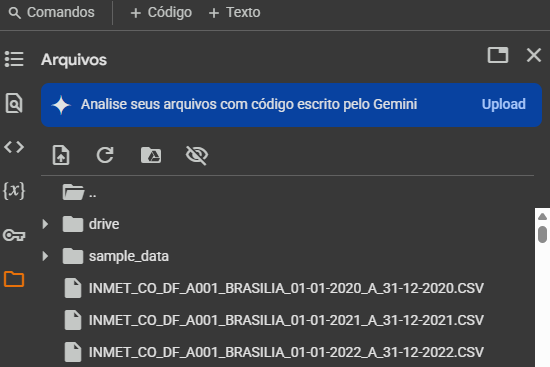

Veja que os nomes dos arquivos possuem a seguinte formatação:

- `INMET_CO_DF_A001_BRASILIA_01-01-2020_A_31-12-2020.CSV`:

    1. INMET: dados do INMET
    2. CO: região do Brasil
    3. DF: unidade da federação
    4. A001: código da estação
    5. BRASILIA: cidade
    6. 01-01-2020: ano, mês e dia inicial
    7. 31-12-2020: ano, mês e dia final



# **PARTE 2):** Escolhendo a estação meteorológica que será analisada

Primeiro precisamos saber quais estações temos disponíveis do INMET. Para isto utilizaremos uma planilha que contém as informações como código da estação, localidade e demais informações. Esta planilha esta disponível no drive da [disciplina](https://github.com/evmpython/CAT212_2025/tree/main/input) e iremos ler diretamente com o pandas.

In [ ]:
# local da planilha que contém as informações das estações meteorológicas
url = 'https://raw.githubusercontent.com/evmpython/CAT212_2025/main/input/CatalogoEsta%C3%A7%C3%B5esAutom%C3%A1ticas.csv'

# leitura da planilha
df = pd.read_csv(url,
                 sep=';',
                 converters={'VL_LATITUDE': lambda x: float(x.replace(',', '.')),
                             'VL_LONGITUDE': lambda x: float(x.replace(',', '.')),
                             'VL_ALTITUDE': lambda x: float(x.replace(',', '.'))})

# mostra a tabela
df

Veja que ao todo temos `564` estações meteorológicas *automáticas* do INMET distribuídas pelo Brasil.

- Escolha abaixo o Estado

In [ ]:
# sigla do estado
uf = 'MG'

# escolhendo as estações do estado
estacoes_estado = df.groupby('SG_ESTADO').get_group(uf)
estacoes_estado

Mostrando as estações num mapa interativo

In [ ]:
# Dados
data = {"DC_NOME": list(estacoes_estado['DC_NOME'].values),
        "SG_ESTADO": list(estacoes_estado['SG_ESTADO'].values),
        "VL_LATITUDE": list(estacoes_estado['VL_LATITUDE'].values),
        "VL_LONGITUDE": list(estacoes_estado['VL_LONGITUDE'].values),
        "VL_ALTITUDE": list(estacoes_estado['VL_ALTITUDE'].values),
        "CD_ESTACAO": list(estacoes_estado['CD_ESTACAO'].values)}
df_estacoes_do_estado = pd.DataFrame(data)

# Dicionário com a latitude e longitude central de cada estado do Brasil
centros_estados = {'AC': {'latitude': -8.7742, 'longitude': -70.6108},
                   'AL': {'latitude': -9.7193, 'longitude': -36.8230},
                   'AM': {'latitude': -3.4167, 'longitude': -65.8560},
                   'AP': {'latitude': 1.3025, 'longitude': -51.7750},
                   'BA': {'latitude': -12.5780, 'longitude': -41.3983},
                   'CE': {'latitude': -5.4880, 'longitude': -39.3206},
                   'DF': {'latitude': -15.7801, 'longitude': -47.9292},
                   'ES': {'latitude': -20.3155, 'longitude': -40.3128},
                   'GO': {'latitude': -16.6864, 'longitude': -49.2644},
                   'MA': {'latitude': -5.3180, 'longitude': -45.2593},
                   'MT': {'latitude': -12.6376, 'longitude': -56.0907},
                   'MS': {'latitude': -20.4394, 'longitude': -54.6010},
                   'MG': {'latitude': -18.5152, 'longitude': -44.2553},
                   'PA': {'latitude': -5.8657, 'longitude': -52.2036},
                   'PB': {'latitude': -7.2765, 'longitude': -36.7813},
                   'PR': {'latitude': -25.3981, 'longitude': -51.9252},
                   'PE': {'latitude': -8.0437, 'longitude': -35.1009},
                   'PI': {'latitude': -6.2159, 'longitude': -42.7853},
                   'RJ': {'latitude': -22.9083, 'longitude': -43.1964},
                   'RN': {'latitude': -5.7945, 'longitude': -36.5982},
                   'RS': {'latitude': -30.0396, 'longitude': -51.2177},
                   'RO': {'latitude': -11.3033, 'longitude': -62.2950},
                   'RR': {'latitude': 2.8144, 'longitude': -60.6835},
                   'SC': {'latitude': -27.5954, 'longitude': -48.5480},
                   'SP': {'latitude': -23.5505, 'longitude': -46.6333},
                   'SE': {'latitude': -10.9472, 'longitude': -37.0731},
                   'TO': {'latitude': -10.2513, 'longitude': -48.2971}}

# Criar o mapa
mapa = folium.Map(location=[centros_estados[uf]['latitude']+2.5,
                            centros_estados[uf]['longitude']],
                            zoom_start=6.4)

# URL direta para o GeoJSON bruto do estado
geojson_url = f"https://raw.githubusercontent.com/giuliano-macedo/geodata-br-states/main/geojson/br_states/br_{uf.lower()}.json"

# Ler o GeoJSON diretamente da web
response = requests.get(geojson_url)
geojson = response.json()

# Adicionar contorno do estado no mapa
folium.GeoJson(geojson,
               name="Limite Estado",
               style_function=lambda x: {"fillColor": "none",
                                         "color": "red",
                                         "weight": 2,
                                         "dashArray": "5, 5"}).add_to(mapa)

# Adicionar marcadores
for _, row in df_estacoes_do_estado.iterrows():

    folium.Marker(

                  # localização dos markers
                  location =  [row["VL_LATITUDE"], row["VL_LONGITUDE"] ],

                  # Popup com estilo customizado (fonte maior e cores alteradas) - O "popup" aparecerá quando você clicar no marcador
                  popup = folium.Popup( f"<div style='text-align: center;'>"
                                        f"<b style='font-size: 14pt; color: red;'>{row['DC_NOME']}</b><br>"
                                        f"<span style='font-size: 12pt; color: green;'>{row['CD_ESTACAO']}</span><br>"
                                        f"<span style='font-size: 12pt; color: gray;'>{row['VL_ALTITUDE']} m</span>",
                                        max_width=600),

                 # Tooltip com estilo customizado (fonte maior e cor alterada) - O "tooltip" aparece quando você passa o mouse sobre o marcador
                 tooltip = folium.Tooltip( f"<span style='font-size: 12pt; color: purple;'>{row['DC_NOME']}</span>" )

                 ).add_to(mapa)

# Mostrar mapa
mapa

Baseado no mapa interativo acima, escolha uma estação para ser analisada. Para isso, click numa estação e copie o código da estação e substitua na variável `estacao` declarada abaixo.

In [ ]:
estacao = 'A509'

**Leitura dos arquivos `CSV`**. Agora iremos ler todos os arquivos CSV dos quatro anos de dados da estação escolhida.

In [ ]:
# listando os arquivos daquela estação
files = sorted(glob.glob(f'/content/INMET*{estacao}*'))
files

In [ ]:
# lista vazia para armazenar os DataFrames de cada ano
dfs = []

# loop nos arquivos
for file in files:

    print(file)

    # leitura da tabela
    df = pd.read_csv(file, encoding='iso-8859-1', skiprows=8,  decimal=',', delimiter=';')

    # adiciona o DataFrame à lista inicial
    dfs.append(df)

Após esse procedimento, a lista `dfs` conterá os `DataFrames` correspondentes aos dados de cada ano de 2020 à 2024. Isso vai permitir que você tenha acesso aos dados e faça análises ou manipulações posteriores com eles com Python.

Mas antes, vamos precisar organizar os dados da lista com `pd.concat()` e colocá-los no formato final.

In [ ]:
# concatenar DataFrames
dados = pd.concat(dfs, ignore_index=True)
dados

In [ ]:
# remover linhas da coluna "Precipitação" com "NaN"
dados.dropna(subset=['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], inplace=True)
dados

In [ ]:
# remover a coluna "Unnamed: 19"
dados.drop(['Unnamed: 19'], axis=1, inplace=True)
dados.head()

Observe que temos uma coluna `Data` para ano/mês/dia e outra `Hora UTC` para hora e minuto. Iremos juntar as duas colunas numa única coluna no formato `ano-mês-dia hora:minuto:segundo`.  

In [ ]:
# Concatenar "Data" e "Hora UTC" e converter para datetime
dados['Data_Hora'] = dados['Data'] + ' ' + dados['Hora UTC'].str.replace(' UTC', '', regex=False)
dados['Data_Hora'] = pd.to_datetime(dados['Data_Hora'], format='%Y/%m/%d %H%M')

# Definir como índice
dados.set_index('Data_Hora', inplace=True)

# Remover colunas antigas
dados.drop(columns=['Data', 'Hora UTC'], inplace=True)

# Exibir as primeiras linhas do dataframe atualizado
dados

**Utilizando a coluna de índices (nesse exemplo são as datas) para selecionar um tempo específico**: função `loc`

In [ ]:
# selecionando os dados do dia 01, mês 12, ano 2006 às 17 h 00 min e 00 seg
dados.loc['2024-12-03 17:00:00']

In [ ]:
# selecionado desta data/horário apenas a coluna de radiação ("Rad")
dados.loc['2024-12-03 17:00:00']['RADIACAO GLOBAL (Kj/m²)']

In [ ]:
# selecionado desta data/horário as colunas de precipitação, radiação e Temperatura
dados.loc['2024-12-03 09:00:00'][['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 'RADIACAO GLOBAL (Kj/m²)','TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)']]

In [ ]:
# selecionando um intervalo de tempo. Neste exemplo estamos selecionado das 17 às 20 horas UTC
dados.loc['2024-12-03 17:00:00': '2024-12-03 20:00:00']

# **PARTE 3):**  Ciclo Horário: climatologia

In [ ]:
# dados que utilizaremos
dados

In [ ]:
# climatológica
horaria_climatologica = dados.groupby(dados.index.hour).mean()
horaria_climatologica

Primeiro iremos plotar a precipitação climatológica média horária:

In [ ]:
# cria moldura da figura
fig, ax = uplt.subplots(figsize=(8,3), tight=True)

# plota a precipitação
ax.plot(uplt.arange(0, 23, 1), horaria_climatologica['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], color='orange', marker='*', label='Valor médio')

# formatação dos eixos X e Y
ax.format(title=f'Estação={estacao} / {uf}', xlabel='Hora (UTC)', ylabel='Precipitação (mm/h)', xticks=2, xtickminor=False, ytickminor=False, xlim=(-1,24))

# legendas
ax.legend(frameon=False, loc='ul', prop={'size': 7})

# salva figura
fig.save(f'{dir}/output/{estacao}_Fig_1a_horario_climatologia_precipitacao.jpg', dpi=300)

# exibe a figura na tela
uplt.show()

Agora iremos plotar a radiação, temperatura mínima e máxima climatológica média horária:

In [ ]:
# cria moldura da figura
fig, ax = uplt.subplots(figsize=(8,3), ncols=2, sharex=True, sharey=False, tight=True)

# formato dos eixos
ax.format(suptitle=f'Estação={estacao} / {uf}', xlabel='Hora (UTC)', xticks=2, xtickminor=False, ytickminor=False, xlim=(-1,24), abc='(A)')

# radiação
ax[0].plot(uplt.arange(0, 23, 1), horaria_climatologica['RADIACAO GLOBAL (Kj/m²)'], color='orange', marker='*')
ax[0].format(ylabel='Radiação (kJ/$m^{2}$)')

# temperaturas
ax[1].plot(uplt.arange(0, 23, 1), horaria_climatologica['TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'], color='bright blue', marker='s', markersize=3, label='Temperatura Mínima')
ax[1].plot(uplt.arange(0, 23, 1), horaria_climatologica['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'], color='bright red', marker='s', markersize=3, label='Temperatura Máxima')
ax[1].format(ylabel='Temperatura ($\degree$C)')

# legendas
ax[1].legend(frameon=False, loc='lr', prop={'size': 6}, ncols=1)

# salva figura
fig.save(f'{dir}/output/{estacao}_Fig_1b_horario_climatologia_radiacao_e_temperatura.jpg', dpi=300)

# exibe a figura na tela
uplt.show()

# **PARTE 4):**  Ciclo Diário: total

In [ ]:
# dados que utilizaremos
dados

In [ ]:
# agrupa os dados
diaria = dados.groupby(pd.Grouper(freq='1D')).mean()

In [ ]:
# a chuva é somada
diaria['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] = dados['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].groupby(pd.Grouper(freq='1D')).sum()

In [ ]:
diaria

In [ ]:
# cria a moldura da figura
fig, ax = uplt.subplots(figsize=(7, 3), tight=True)

# plota gráfico de barras
ax.bar(diaria['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].index,
       diaria['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'],
       color='blue')

# formato dos eixos
ax.format(title=f'Estação={estacao} / {uf}',
          xlabel='Ano',
          ylabel='Precipitação (mm/dia)',
          small='15px',
          large='15px',
          xrotation=0,
          ytickminor=False)

# salva figura
fig.save(f'{dir}/output/{estacao}_Fig_2_diario_precipitacao.jpg', dpi=300)

# exibe figura na tela
uplt.show()

# **PARTE 5):**  Ciclo Mensal: total e climatologia

**Mensal Total**

In [ ]:
# dados que utilizaremos
dados

Iremos agrupar as variáveis para cada mês da série histórica. No caso da precipitação será a soma da chuva, para as demais variáveis será a média.

In [ ]:
mensal = dados.groupby(pd.Grouper(freq='1M')).mean()
mensal['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] = dados['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].groupby(pd.Grouper(freq='1M')).sum()

In [ ]:
mensal

In [ ]:
# cria moldura da figura
fig, ax = plt.subplots(figsize=(9, 4), ncols=2)

# criar boxplot de "PRECIPITAÇÃO" mensal
sns.boxplot(x=mensal.index.month, y=mensal['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], ax=ax[0], color='bright blue')
ax[0].set_xlabel('Mês', fontsize=10)
ax[0].set_ylabel('Precipitação (mm/mês)', fontsize=10)
ax[0].set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
ax[0].minorticks_on()
ax[0].set_title(f'Estação={estacao} / {uf}')

# boxplot de "TEMPERATURA" mensal
sns.boxplot(x=mensal.index.month, y=mensal['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'], ax=ax[1], palette='Reds')
ax[1].set_xlabel('Mês', fontsize=10)
ax[1].set_ylabel('Temperatura ($\degree$C)', fontsize=10)
ax[1].set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
ax[1].minorticks_on()
ax[1].set_title(f'Estação={estacao} / {uf}')

# salva figura
plt.savefig(f'{dir}/output/{estacao}_Fig_3a_mensal_precipitacao.jpg', dpi=300, bbox_inches='tight')

# exibe figura na tela
plt.tight_layout()
plt.show()

Como podemos ver, criar *boxplots* é uma tarefa razoavelmente simples com Python e `Seaborn`. É possível fazer muito mais (veja a seção da [*Python Graph Gallery*](https://www.python-graph-gallery.com/boxplot/) sobre o tema), como *violinplots* e combinar *stripplots* nos gráficos.

Veja abaixo um resumo sobre os itens que contém um boxplot. Maiores informações clique [aqui](https://blog.proffernandamaciel.com.br/como-ler-um-boxplot/).

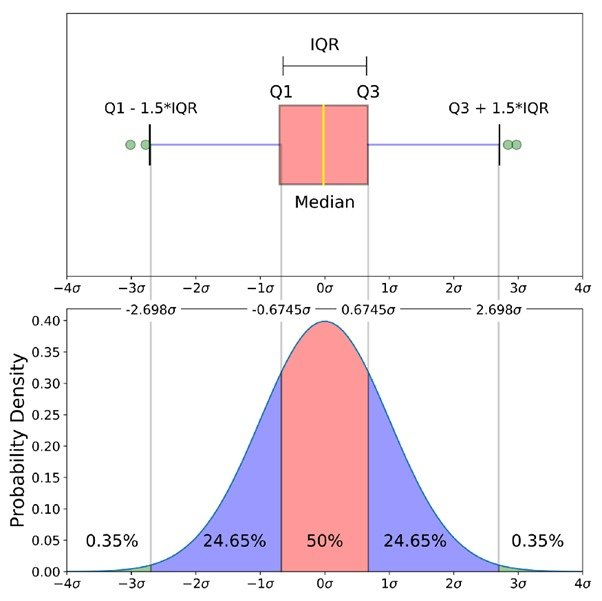

**Mensal climatológica**

In [ ]:
mensal

In [ ]:
mensal_climatologia = mensal.groupby(mensal.index.month).mean()
mensal_climatologia

In [ ]:
# cria moldura da figura
fig, ax = uplt.subplots(figsize=(10,4), tight=True)

# eixos gêmeos em x
ax2 = ax.twinx()

# precipitação
ax.bar(uplt.arange(1, 12, 1), mensal_climatologia['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], color='blue', alpha=0.5)

# temperaturas
ax2.plot(uplt.arange(1, 12, 1), mensal_climatologia['TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'], color='bright blue', label='Temp. Mín.')
ax2.plot(uplt.arange(1, 12, 1), mensal_climatologia['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'], color='bright red', label='Temp. Máx.')

# formatações
ax.format(title=f'Climograma - Estação={estacao} / {uf}',
          xlabel='Mês', ylabel='Precipitação (mm/mês)',
          xticklabels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'],
          xticks=uplt.arange(1, 12, 1),
          xtickminor=False, ytickminor=False)

# formato do segundo eixo Y (a direita)
ax2.format(ylabel='Temperatura ($\degree$C)', ytickminor=False)

# legenda
ax2.legend(bbox_to_anchor=(1.2, 0.6), ncols=1, frameon=False)

# salva figura
fig.save(f'{dir}/output/{estacao}_Fig_3b_mensal_climatologia_precipitacao.jpg', dpi=300)

# exibe figura na tela
uplt.show()

# **PARTE 6):**  Ciclo Anual: total

In [ ]:
# dados que utilizaremos
dados

In [ ]:
anual = dados.groupby(pd.Grouper(freq='1Y')).mean()
anual['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] = dados['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].groupby(pd.Grouper(freq='1Y')).sum()

In [ ]:
# cria moldura da figura
fig, ax = uplt.subplots(figsize=(10, 5), tight=True)

# precipitação
ax.bar(anual.index.year, anual['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], color='blue', alpha=0.5)

# formatação do eixo
ax.format(title=f'Distribuição Anual de Precipitação - Estação={estacao} / {uf}', xlabel='Anos', ylabel='Precipitação (mm/ano)',
          small='20px', large='20px',
          xtickminor=False, ytickminor=False)

# salva figura
fig.save(f'{dir}/output/{estacao}_Fig_4_anual_precipitacao.jpg', dpi=300)

# exibe figura na tela
uplt.show()

# **PARTE 7):** Salvando a tabela num arquivo CSV

In [ ]:
# mostrando os dados mensais
mensal

**Para formatar melhor a tabela, você pode remover o `index` que esta associado a coluna `Data_Hora` e criar novas colunas para os anos e meses.**

In [ ]:
# remover o índice de datas
nova_tabela = mensal.reset_index(drop=True)

# incluir uma coluna de danos na posição 1
nova_tabela.insert(0, 'Ano', mensal.index.year)

# incluir uma coluna de meses na posição 2
nova_tabela.insert(1, 'Mes', mensal.index.month)

In [ ]:
nova_tabela

**E agora, você pode `salvar` o `DataFrame` em formato csv com `.to_csv()`:**

In [ ]:
mensal.to_csv(f'{dir}/output/{estacao}_tabela_mensal.csv')